# Proyecto: Predicción de Alzheimer a partir de MRI usando Deep Learning




## **0. Integrantes del equipo de trabajo**
---
1. RAÚL RAMÍREZ PENAGOS
2. IVÁN QUEVEDO
3. LINA ÁVILA MORENO

## **1. Entendimiento de los datos**

El conjunto de datos contiene 4 clases y etiquetas del 0 al 3:

1. Non demented : '0'
2. Very midly demented : '1'
3. Mildly demented : '2'
4. Moderately demented : '3'

In [ ]:
#pip install opencv-python
#!pip install tensorflow

In [ ]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import hashlib
import matplotlib.cm as cm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import random
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



In [ ]:
#!pip install pyarrow

In [ ]:
# Ejecución local
local_path = "~/Downloads/diplomado/mlds3"
df_train = pd.read_parquet(f"{local_path}/train.parquet")
df_test = pd.read_parquet(f"{local_path}/test.parquet")

In [ ]:
etiqueta_enfermedad_categoria = {
    0: "Mild Demented",
    1: "Moderate Demented",
    2: "Non Demented",
    3: "Very Mild Demented",
}

In [ ]:
def decodificar_imagen(image_dict):
    if isinstance(image_dict, dict) and "bytes" in image_dict:
        byte_string = image_dict["bytes"]
        datos_raw_np = np.frombuffer(byte_string, np.uint8)

        # Cargar en escala de grises (1 canal)
        img = cv2.imdecode(datos_raw_np, cv2.IMREAD_GRAYSCALE)

        # Redimensionar
        img = cv2.resize(img, (224, 224))

        # Expandir a 3 canales se replicó la imagen en gris
        img_3ch = np.stack([img, img, img], axis=-1)

        return img_3ch

    else:
        raise TypeError(f"Se esperaba un diccionario {type(image_dict)}")

## **2. Evaluación**

<Figure size 800x600 with 0 Axes>

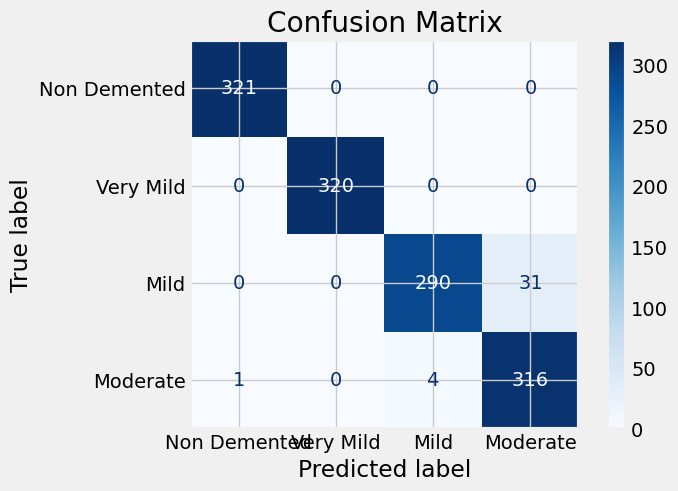

              precision    recall  f1-score   support

Non Demented       1.00      1.00      1.00       321
   Very Mild       1.00      1.00      1.00       320
        Mild       0.99      0.90      0.94       321
    Moderate       0.91      0.98      0.95       321

    accuracy                           0.97      1283
   macro avg       0.97      0.97      0.97      1283
weighted avg       0.97      0.97      0.97      1283



In [ ]:
y_true = val_gen.y
# 3. Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_labels = ["Non Demented", "Very Mild", "Mild", "Moderate"]

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

#Reporte de clasificación
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=class_labels))

41/41 [==============================] - 2s 50ms/step


<Figure size 800x600 with 0 Axes>

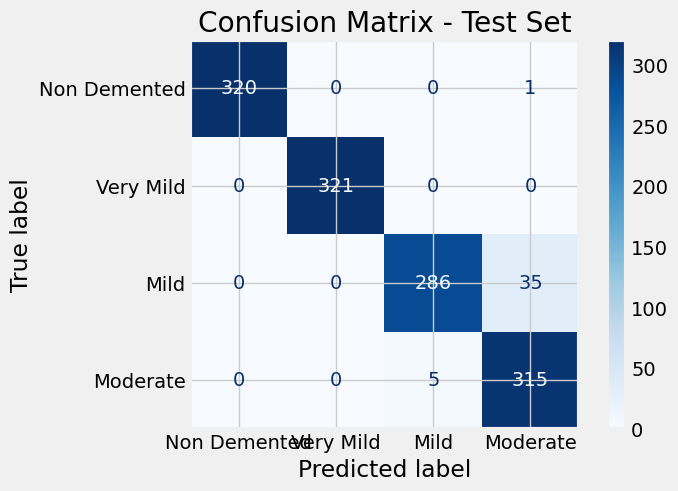

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)
test_gen = test_datagen.flow(X_test, y_test, batch_size=batch_size, shuffle=False)

y_test_true = test_gen.y
y_test_pred = np.argmax(model.predict(test_gen), axis=1)

# Predicciones
y_test_pred_prob = model.predict(test_gen)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

# Ver etiquetas reales
y_test_true = test_gen.y

# Etiquetas legibles
class_labels = ["Non Demented", "Very Mild", "Mild", "Moderate"]

# Matriz
cm = confusion_matrix(y_test_true, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Test Set")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
# 1. Obtener y verdaderos
y_test_true = test_gen.y  # etiquetas reales desde el generador

# 2. Obtener predicciones del modelo
y_test_pred_probs = model.predict(test_gen)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

# 3. Mostrar reporte
print(classification_report(y_test_true, y_test_pred))

41/41 [==============================] - 2s 49ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       321
           2       0.98      0.89      0.93       321
           3       0.90      0.98      0.94       320

    accuracy                           0.97      1283
   macro avg       0.97      0.97      0.97      1283
weighted avg       0.97      0.97      0.97      1283



In [ ]:
model.save('modelo_alzheimer.h5')
print("Modelo guardado exitosamente como 'modelo_alzheimer.h5'")